In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import dwong

In [2]:
dwong.os.chdir("/Users/wongdowling/Desktop/DQ_Dowling/electron/csv/")
data = pd.read_csv("pure_emcal.csv")

In [3]:
data

,label,wew_x,wew_y,wid_x,wid_y,skew_x,skew_y,kurt_x,kurt_y
0,1.0,1.584334,1.465552,11.281222,9.981665,-0.465606,0.150234,-0.465606,0.150234
1,1.0,2.007739,1.524296,8.507692,8.338515,-0.427125,-0.075675,-0.427125,-0.075675
2,1.0,3.126703,2.135596,10.663046,10.803723,-0.028791,-0.312597,-0.028791,-0.312597
3,1.0,5.345500,1.823037,12.140334,12.363477,0.042607,0.350772,0.042607,0.350772
4,1.0,2.276824,1.549370,11.703530,10.924367,-0.106593,-0.045031,-0.106593,-0.045031
...,...,...,...,...,...,...,...,...,...
7524,0.0,4.825564,7.183968,7.292242,11.987337,0.308505,-0.042863,0.308505,-0.042863
7525,0.0,5.852878,5.908005,14.188504,10.287933,0.500359,-0.337997,0.500359,-0.337997
7526,0.0,2.525472,2.587707,10.404633,6.879240,0.043240,-0.061167,0.043240,-0.061167
7527,0.0,3.554478,4.037831,11.389580,13.993940,0.100684,1.116287,0.100684,1.116287


In [6]:
#define the predictor variables and the response variable
X = data[["wew_x","wew_y", "wid_x", "wid_y", "skew_x","skew_y", "kurt_x","kurt_y"]]
y = data["label"]

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 
from sklearn.metrics import roc_curve, auc


In [7]:
from sklearn.linear_model import LogisticRegression
#instantiate the model
log_regression = LogisticRegression()
#fit the model using the training data
log_regression.fit(X_train,y_train)
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
log_fpr, log_tpr, log_thres = metrics.roc_curve(y_test,  y_pred_proba)
log_auc = metrics.roc_auc_score(y_test, y_pred_proba)

In [8]:
from sklearn.svm import SVC
#instantiate the model
model_SVC = SVC(kernel = 'rbf', random_state = 4)
#fit the model using the training data
model_SVC.fit(X_train, y_train)
y_pred_svm = model_SVC.decision_function(X_test)
svm_fpr, svm_tpr, svm_thres = roc_curve(y_test, y_pred_svm)
svm_auc = auc(svm_fpr, svm_tpr)

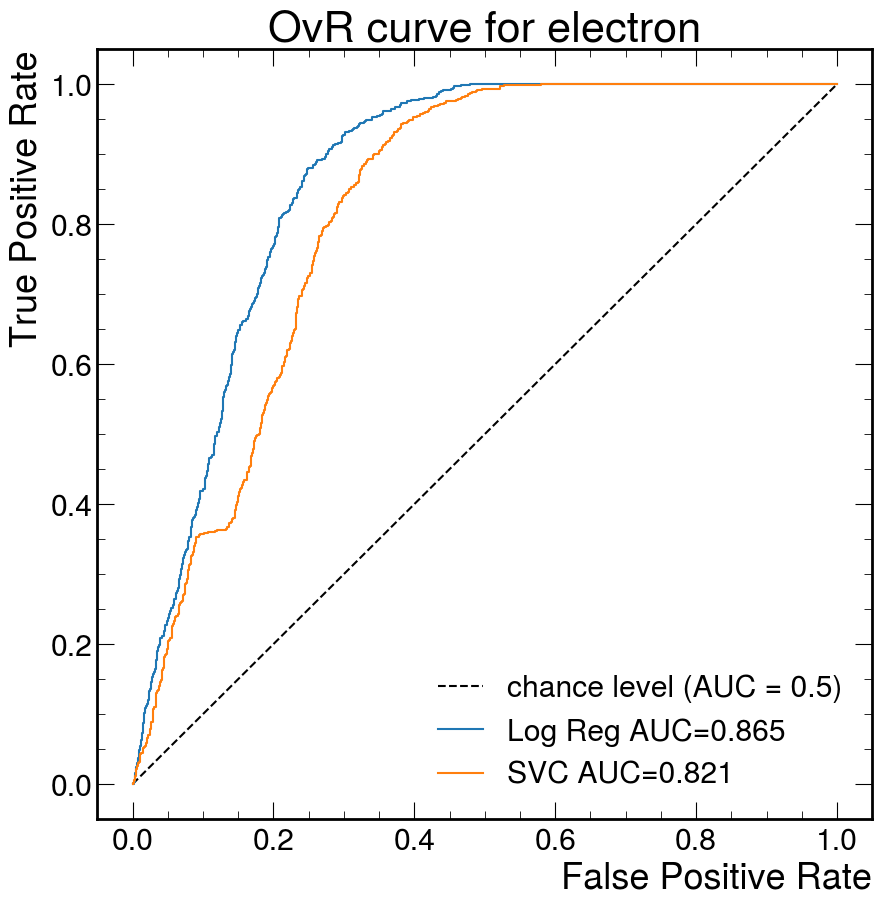

In [9]:
#create ROC curve
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")#diagonal line
plt.plot(log_fpr,log_tpr,label="Log Reg AUC="+str(round(log_auc,3)))
plt.plot(svm_fpr,svm_tpr,label="SVC AUC="+str(round(svm_auc,3)))

plt.title("OvR curve for electron")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.savefig("OvR_electron.png")
plt.show()

In [15]:
import os
os.getcwd()

'/Users/wongdowling/Desktop/DQ_Dowling/electron/csv'

In [12]:
n=data["diff_x"]

In [19]:

for i in range(len(n)):
    if n[i][1:-1]=="":
        

ValueError: could not convert string to float: ''